# Analyze results

In [21]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Now you can import your module
from utils.src import analysis_functions, dataset

# Retest Récidive Locale


In [22]:
params = dataset.load_config("/home/tachennf/Documents/delta-rad/1D_radiomics/nested_cv_settings.yaml")
folder_path = params['paths']['data_folder_path']
outcome_csv = params['paths']['outcome_csv_file']
results_file = params['paths']['results_file']   
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list = params['parameters']['outcomes_list']
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
nice_tables = ['SIMU', 'F1', 'F3', 'F5', 'Simu_F1', 'Simu_F3', 'Simu_F5', 'F1_F3', 'F1_F5']

results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_mridian_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv'])
['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN', 'BAGG', 'QDA']
['ANOVA_K_BEST', 'RDM_SEL', 'RF']


# Compare one algo with different metrics and CI

In [23]:
pred_algo = "RF"
feat_sel_algo = "ANOVA_K_BEST"
inter_res = results['simu_mridian_gtv.csv'][feat_sel_algo][pred_algo]['Récidive Locale']
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))
    print("Test sensitivity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['sensitivity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[1]))
    print("Test specificity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['specificity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[1]))
    print('')


1 ['original_shape_Elongation']
Train AUC:  0.7224496877870716
{'values': [0.5395767502551421, 0.5497809142461201, 0.49633651467580003, 0.9041176688430811, 0.5771284391414261], 'conf_int': [[0.20753205128205102, 0.835897435897435], [0.164423076923076, 0.818181818181818], [0.16666666666666602, 0.8086538461538461], [0.5769230769230761, 1.0], [0.123958333333333, 0.9092424242424241]]}
Test AUC: 0.6133880574323138 (0.2479006410256404; 0.8743951048951046)
Test Brier loss: 0.26052535045680403 (0.1803953934551826; 0.34371136551865844)
Test sensitivity: 0.3833333333333332 (0.3833333333333332; 0.3833333333333332)
Test specificity: 0.6036363636363634 (0.6036363636363634; 0.6036363636363634)

2 ['original_shape_Elongation', 'original_firstorder_Kurtosis']
Train AUC:  0.7473012702999102
{'values': [0.5620239641578021, 0.35564168077054603, 0.409430532178199, 0.7701797444798161, 0.6814678026491211], 'conf_int': [[0.21792307692307603, 0.8908839285714281], [0.09840909090909, 0.6724999999999991], [0.0, 

## Best train AUC
### Display

In [24]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='train_auc', k = 10)
analysis_functions.print_top_results(top_results, metric='train_auc')

Table: simu_mridian_gtv.csv
  Mean train_auc: 1.0, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn', 'original_glcm_Id', 'original_glcm_JointEntropy'], Parameters: {'BAGG__n_estimators': 175}
  Mean train_auc: 0.999, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_shape_Maximum2DDiameterRow'], Parameters: {'BAGG__n_estimators': 625}
  Mean train_auc: 0.976, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis', 'original_glszm_LargeAreaHighGrayLevelEmphasis'], Parameters: {'KNN__n_neighbors': 2}

Table: f1_gtv.csv
  Mean train_auc: 1.0, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn', 'original_glcm_Id', 'original_glcm_JointEntropy'], Parameters: {'BAGG__n_estimators': 25}
  Mean train_auc: 0.968, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Features: 

### Boxplot

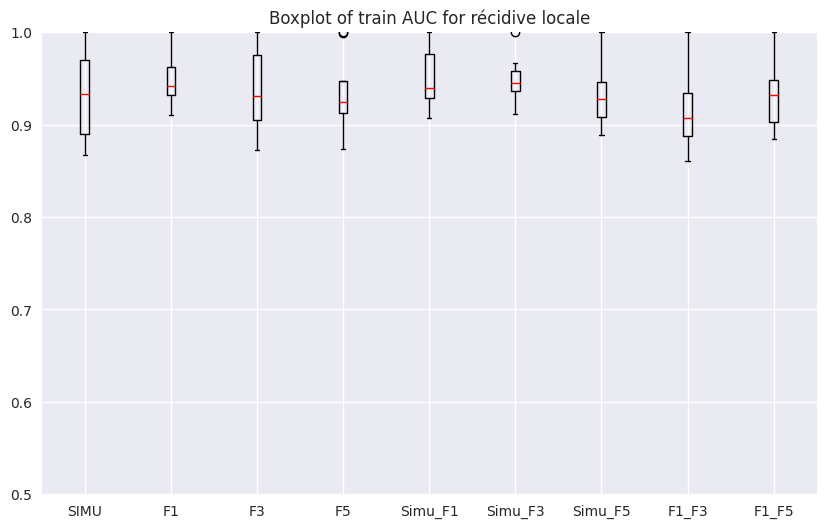

In [25]:
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of train AUC for récidive locale')
plt.ylim([0.5, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)


## Best train Brier loss
### Display

In [26]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='train_brier_loss', k = 10)
analysis_functions.print_top_results(top_results, metric='train_brier_loss')

Table: simu_mridian_gtv.csv
  Mean train_brier_loss: 0.267, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: QDA, Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy', 'original_shape_SurfaceVolumeRatio'], Parameters: {'QDA__reg_param': 0.01}
  Mean train_brier_loss: 0.255, Feature Selection Algorithm: RF, Prediction Algorithm: QDA, Features: ['original_glcm_Idn'], Parameters: {'QDA__reg_param': 0.03}
  Mean train_brier_loss: 0.251, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}

Table: f1_gtv.csv
  Mean train_brier_loss: 0.296, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: QDA, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis'], Parameters: {'QDA__reg_param': 0.099999999999999}
  Mean train_brier_loss: 0.262, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: QDA, Features: ['orig

### Boxplot

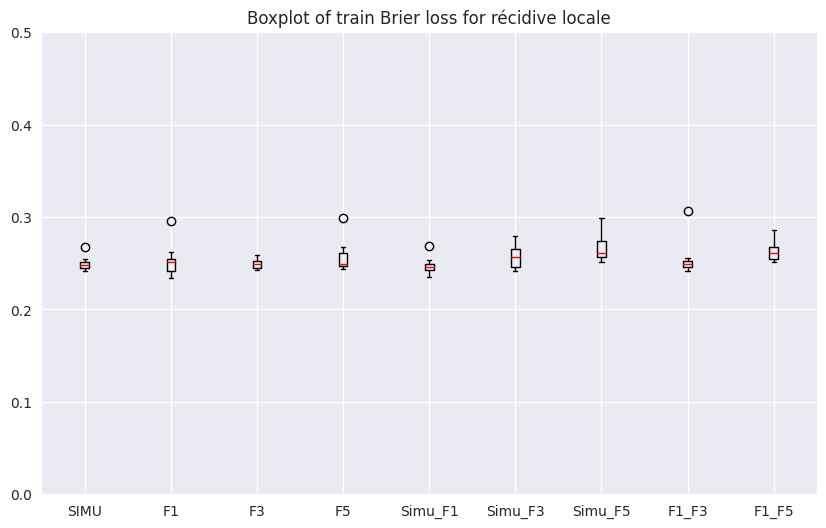

In [27]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of train Brier loss for récidive locale')
plt.ylim([0, 0.5])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

## Best test AUC
### Display

In [28]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='test_auc', k = 10)
analysis_functions.print_top_results(top_results, metric='test_auc')

Table: simu_mridian_gtv.csv
  Mean test_auc: 0.643, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn', 'original_glcm_Id'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}
  Mean test_auc: 0.637, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: LOGREGRIDGE, Features: ['original_shape_Elongation'], Parameters: {'LOGREGRIDGE__C': 0.0001, 'LOGREGRIDGE__penalty': 'l2'}
  Mean test_auc: 0.613, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_shape_Elongation'], Parameters: {'RF__max_depth': 1, 'RF__n_estimators': 25}

Table: f1_gtv.csv
  Mean test_auc: 0.775, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis'], Parameters: {'BAGG__n_estimators': 425}
  Mean test_auc: 0.757, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: ADABOOST, Features: ['original_glcm_MCC'

### Boxplot

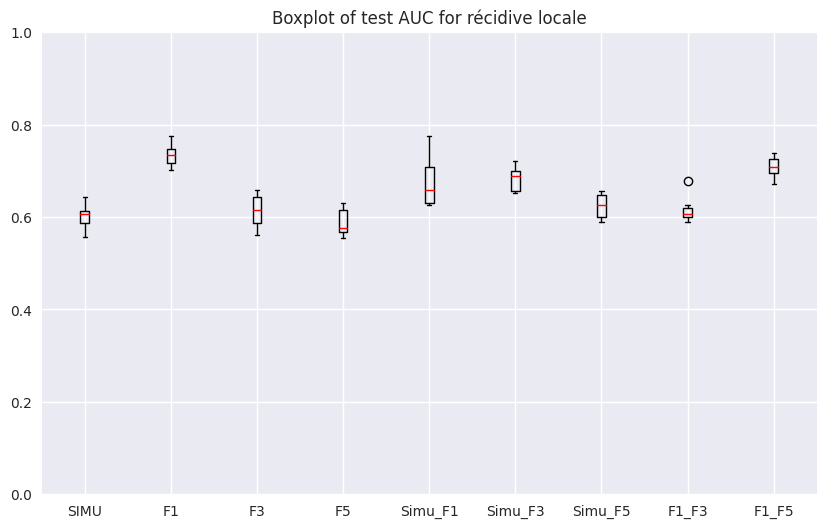

In [29]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test AUC for récidive locale')
plt.ylim([0, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

## Best test brier loss
### Display

In [37]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='test_brier_loss', k = 10)
analysis_functions.print_top_results(top_results, metric='test_brier_loss')

Table: simu_mridian_gtv.csv
  Mean test_brier_loss: 0.643, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn', 'original_glcm_Id'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}
  Mean test_brier_loss: 0.637, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: LOGREGRIDGE, Features: ['original_shape_Elongation'], Parameters: {'LOGREGRIDGE__C': 0.0001, 'LOGREGRIDGE__penalty': 'l2'}
  Mean test_brier_loss: 0.613, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_shape_Elongation'], Parameters: {'RF__max_depth': 1, 'RF__n_estimators': 25}

Table: f1_gtv.csv
  Mean test_brier_loss: 0.775, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis'], Parameters: {'BAGG__n_estimators': 425}
  Mean test_brier_loss: 0.757, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: ADABO

### Boxplot

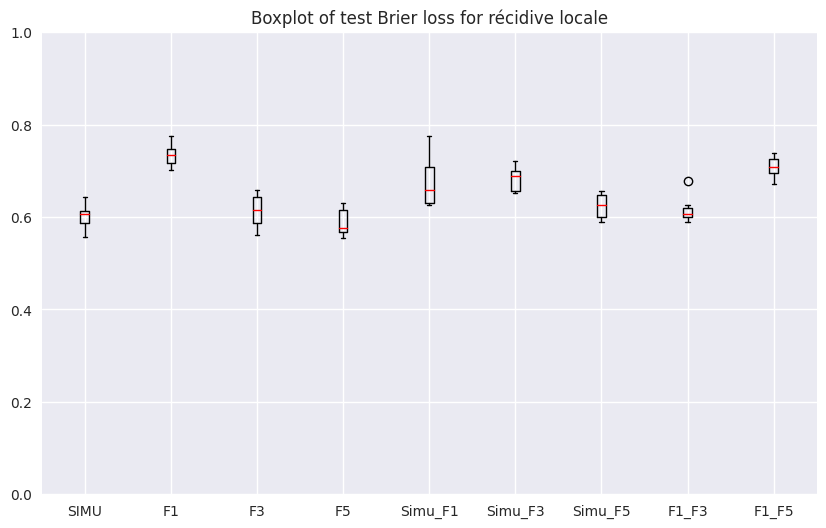

In [38]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test Brier loss for récidive locale')
plt.ylim([0, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

## Best sensitivity
### Display

In [40]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='sensitivity', k = 10)
analysis_functions.print_top_results(top_results, metric='sensitivity')

Table: simu_mridian_gtv.csv
  Mean sensitivity: 0.643, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn', 'original_glcm_Id'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}
  Mean sensitivity: 0.637, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: LOGREGRIDGE, Features: ['original_shape_Elongation'], Parameters: {'LOGREGRIDGE__C': 0.0001, 'LOGREGRIDGE__penalty': 'l2'}
  Mean sensitivity: 0.613, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_shape_Elongation'], Parameters: {'RF__max_depth': 1, 'RF__n_estimators': 25}

Table: f1_gtv.csv
  Mean sensitivity: 0.775, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis'], Parameters: {'BAGG__n_estimators': 425}
  Mean sensitivity: 0.757, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: ADABOOST, Features: ['ori

### Boxplot

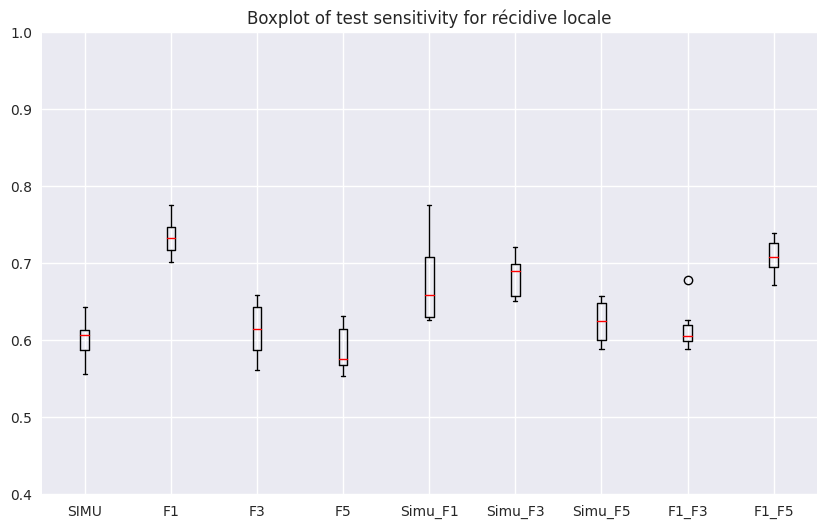

In [42]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test sensitivity for récidive locale')
plt.ylim([0.4, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

## Best specificity

In [43]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='specificity', k = 10)
analysis_functions.print_top_results(top_results, metric='specificity')

Table: simu_mridian_gtv.csv
  Mean specificity: 0.643, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn', 'original_glcm_Id'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}
  Mean specificity: 0.637, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: LOGREGRIDGE, Features: ['original_shape_Elongation'], Parameters: {'LOGREGRIDGE__C': 0.0001, 'LOGREGRIDGE__penalty': 'l2'}
  Mean specificity: 0.613, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_shape_Elongation'], Parameters: {'RF__max_depth': 1, 'RF__n_estimators': 25}

Table: f1_gtv.csv
  Mean specificity: 0.775, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis'], Parameters: {'BAGG__n_estimators': 425}
  Mean specificity: 0.757, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: ADABOOST, Features: ['ori

### Boxplot

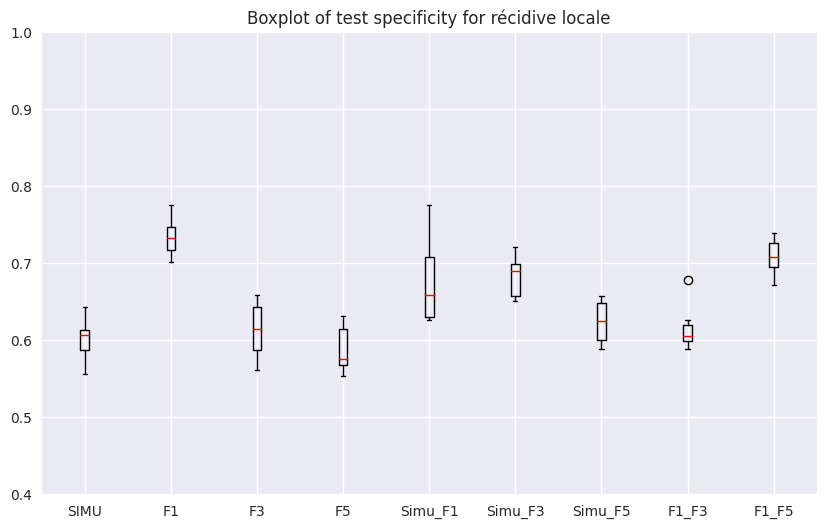

In [44]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test specificity for récidive locale')
plt.ylim([0.4, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

## Best spe & sens

In [ ]:
analysis_functions.find_perf_alg(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, metric='sens_spec', threshold=0.6)

Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Number of Features: 1, '
'                                           TEST AUC: 0.6878576188494153, Sensitivity: 0.7333333333333332, Specificity: 0.6090909090909087, '
'                                           Features: ['original_glcm_MCC']
Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Number of Features: 1, '
'                                           TEST AUC: 0.7482548796939057, Sensitivity: 0.6499999999999998, Specificity: 0.6590909090909088, '
'                                           Features: ['original_glcm_MCC']
Table: f3_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Number of Features: 3, '
'                                           TEST AUC: 0.6569577684767776, Sensitivity: 0.6666666666666666, Specificity: 0.7196969696969693, '
'   